In [2]:
#import libraries
import numpy as np 
import pandas as pd

# Read data files
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
# Combining the training and testing data for better understanding of dataset
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']=0
data=pd.concat([train,test],sort=False,ignore_index=True)
print(test.shape,data.shape,train.shape)

(5681, 13) (14204, 13) (8523, 13)


In [7]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# unique values in each columns
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [10]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features1 = categorical_features[categorical_features.columns.difference(['Item_Identifier', 'Outlet_Identifier','source'])]


In [11]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [12]:
data['Item_Fat_Content']

0        Low Fat
1        Regular
2        Low Fat
3        Regular
4        Low Fat
          ...   
14199    Regular
14200    Regular
14201    Low Fat
14202    Regular
14203    Regular
Name: Item_Fat_Content, Length: 14204, dtype: object

In [36]:
for col in categorical_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDB58    10
FDQ04    10
FDG10    10
DRN37    10
NCM18    10
         ..
NCL42     7
FDM52     7
FDL50     7
FDH58     7
FDR51     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548


In [13]:
# Missing values in Item_weight
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
#Calculate total missing values
missing_values = data['Item_Weight'].isnull()
#print total missing values before handling 
print ('Orignal missing values: %d'% sum(missing_values))
#function for handling missing values 
data.loc[missing_values,'Item_Weight'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,"Item_Weight"])
#printing count of missing values remaining 
print('Missing values remaining %d' %sum(data['Item_Weight'].isnull()))

Orignal missing values: 2439
Missing values remaining 0


In [14]:
# Replacing missing values in Outlet_size with mode
#importing mode function from scipy
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
missing_values = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal missing values: %d'% sum(missing_values))
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal missing values: 4016
0


In [15]:
#Modifying item visibilty
visibilty_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")
missing_values=(data['Item_Visibility']==0)

print("\nNumber of 0 values intially: %d"% sum(missing_values))

data.loc[missing_values,"Item_Visibility"]=data.loc[missing_values,"Item_Identifier"].apply(lambda x: visibilty_avg.at[x,'Item_Visibility'])

print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))


Number of 0 values intially: 879
Number of 0 values after modification: 0


In [16]:
#Create a broad category of Type of Item
#Get the first two characters of ID
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [20]:
#Determining years of operation of a store
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [21]:
#Modify the categories of item fat content
print("Original Categories")
print(data['Item_Fat_Content'].value_counts())

print("Modified Categories")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':"Regular",'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts)

Original Categories
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Modified Categories
<bound method IndexOpsMixin.value_counts of 0        Low Fat
1        Regular
2        Low Fat
3        Regular
4        Low Fat
          ...   
14199    Regular
14200    Regular
14201    Low Fat
14202    Regular
14203    Regular
Name: Item_Fat_Content, Length: 14204, dtype: object>


In [22]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


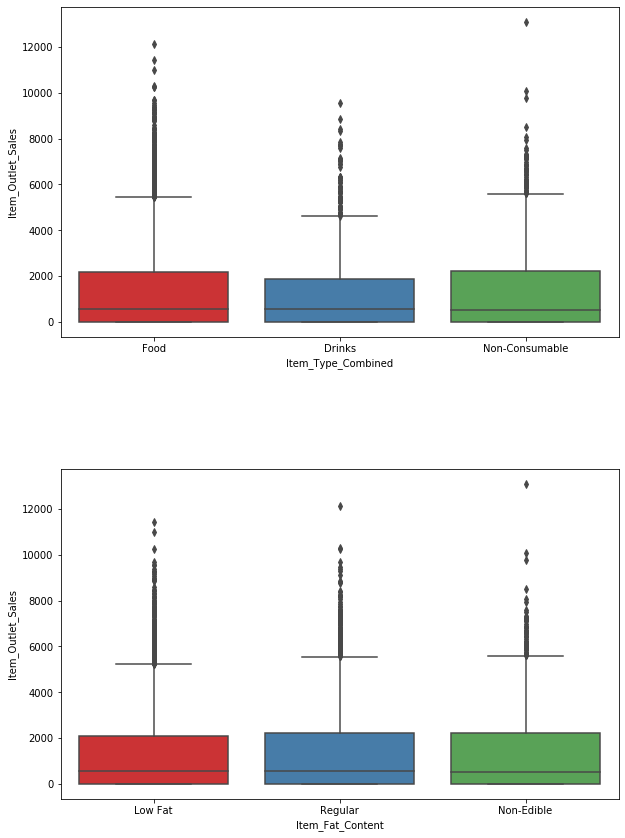

In [41]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=data,palette='Set1')

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data,palette='Set1')

plt.subplots_adjust(wspace=0.2,hspace=0.4,top=1.5)
plt.show()

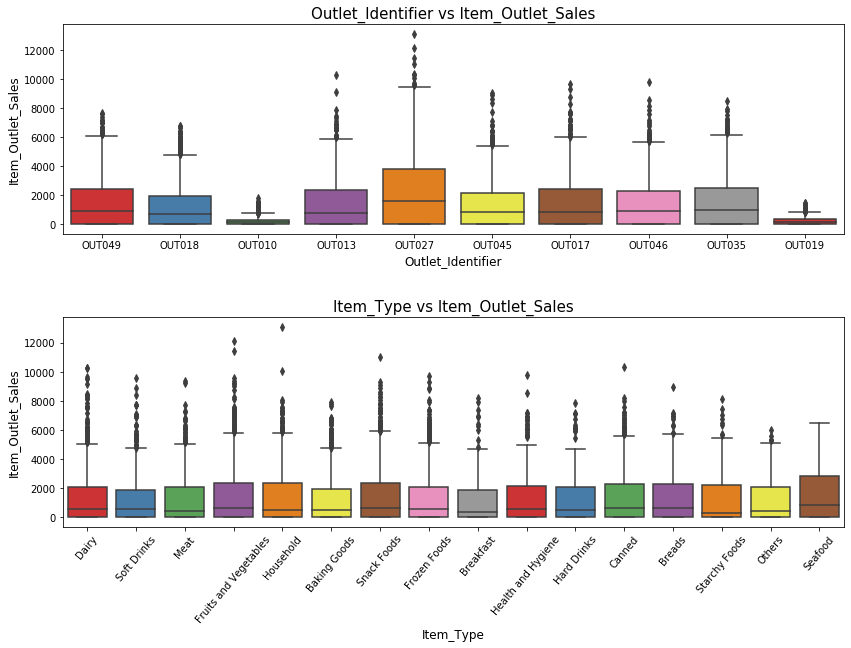

In [54]:
plt.figure(figsize=(14,9))

plt.subplot(211)
ab=sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data,palette='Set1')
ab.set_title("Outlet_Identifier vs Item_Outlet_Sales",fontsize=15)
ab.set_xlabel("Outlet_Identifier",fontsize=12)
ab.set_ylabel("Item_Outlet_Sales",fontsize=12)

plt.subplot(212)
ab=sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='Set1')
ab.set_title("Item_Type vs Item_Outlet_Sales",fontsize=15)
ab.set_xlabel("Item_Type",fontsize=12)
ab.set_ylabel("Item_Outlet_Sales",fontsize=12)

plt.subplots_adjust(hspace=0.4,top=0.9)
plt.setp(ab.get_xticklabels(),rotation=50)
plt.show()


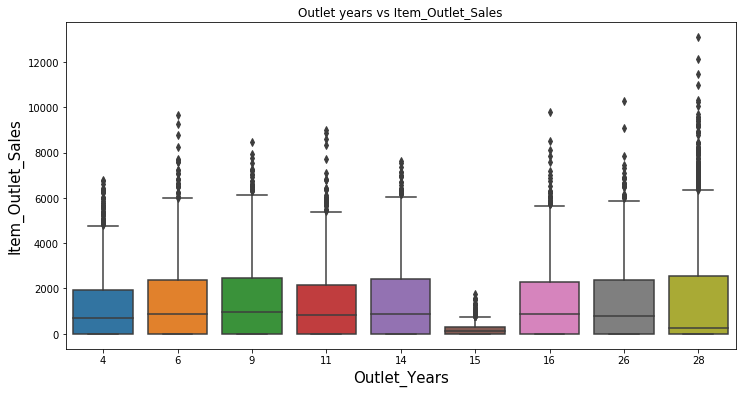

In [52]:
plt.figure(figsize = (12,6))
ab = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ab.set_xticklabels(ab.get_xticklabels(), rotation = 0)
ab.set_title('Outlet years vs Item_Outlet_Sales')
ab.set_xlabel('Outlet_Years', fontsize = 15)
ab.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [57]:
#Converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le=LabelEncoder()
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [58]:
#using pd.get_dummies converting the categorical variable to numerical variables
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [59]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [60]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
   #cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    #cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1128


C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


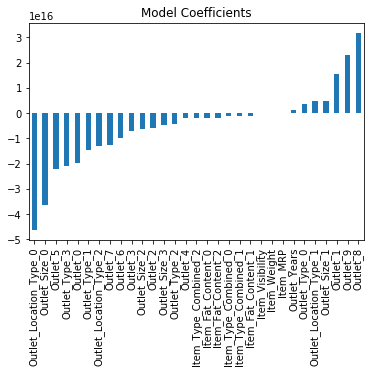

In [82]:
#Making Linear Regression model for prediction
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [84]:
df=pd.read_csv("alg1.csv")
df.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1862.0
1,FDW14,OUT017,1540.0
2,NCN55,OUT010,1858.0
3,FDQ58,OUT017,2558.0
4,FDY38,OUT027,5214.0
5,FDH56,OUT046,1942.0
6,FDL48,OUT018,574.0
7,FDC48,OUT027,2822.0
8,FDN33,OUT045,1494.0
9,FDA36,OUT017,3056.0
